Seleção de uma série temporal (real ou simulada)

In [97]:
# ler dados
import pandas as pd

df = pd.read_csv('../tesla_data.csv')

In [98]:
df.head()

,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
0,2023,5,Europe,Model S,17646,17922,92874.27,120,704,1863.42,Interpolated (Month),12207
1,2015,2,Asia,Model X,3797,4164,62205.65,75,438,249.46,Official (Quarter),7640
2,2019,1,North America,Model X,8411,9189,117887.32,82,480,605.59,Interpolated (Month),14071
3,2021,2,North America,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),9333
4,2016,12,Middle East,Model Y,12374,13537,114846.78,120,661,1226.88,Estimated (Region),8722


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  2640 non-null   int64  
 1   Month                 2640 non-null   int64  
 2   Region                2640 non-null   object 
 3   Model                 2640 non-null   object 
 4   Estimated_Deliveries  2640 non-null   int64  
 5   Production_Units      2640 non-null   int64  
 6   Avg_Price_USD         2640 non-null   float64
 7   Battery_Capacity_kWh  2640 non-null   int64  
 8   Range_km              2640 non-null   int64  
 9   CO2_Saved_tons        2640 non-null   float64
 10  Source_Type           2640 non-null   object 
 11  Charging_Stations     2640 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 247.6+ KB


In [100]:
# criando coluna data
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')

In [101]:
df

,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations,Date
0,2023,5,Europe,Model S,17646,17922,92874.27,120,704,1863.42,Interpolated (Month),12207,2023-05-01
1,2015,2,Asia,Model X,3797,4164,62205.65,75,438,249.46,Official (Quarter),7640,2015-02-01
2,2019,1,North America,Model X,8411,9189,117887.32,82,480,605.59,Interpolated (Month),14071,2019-01-01
3,2021,2,North America,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),9333,2021-02-01
4,2016,12,Middle East,Model Y,12374,13537,114846.78,120,661,1226.88,Estimated (Region),8722,2016-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2021,10,Middle East,Model Y,13488,14333,113771.10,120,719,1454.68,Official (Quarter),4273,2021-10-01
2636,2019,7,Middle East,Model S,18300,18407,81889.67,82,487,1336.81,Official (Quarter),9833,2019-07-01
2637,2019,9,Asia,Model S,13291,14839,97139.38,100,580,1156.32,Estimated (Region),13709,2019-09-01
2638,2020,5,Asia,Cybertruck,3471,3714,69990.57,60,358,186.39,Interpolated (Month),6754,2020-05-01


In [102]:
# gerando dados sobre as vendas de um modelo específico, nesse caso o model s
model = "Model S"

df_model = df[df['Model'] == model]

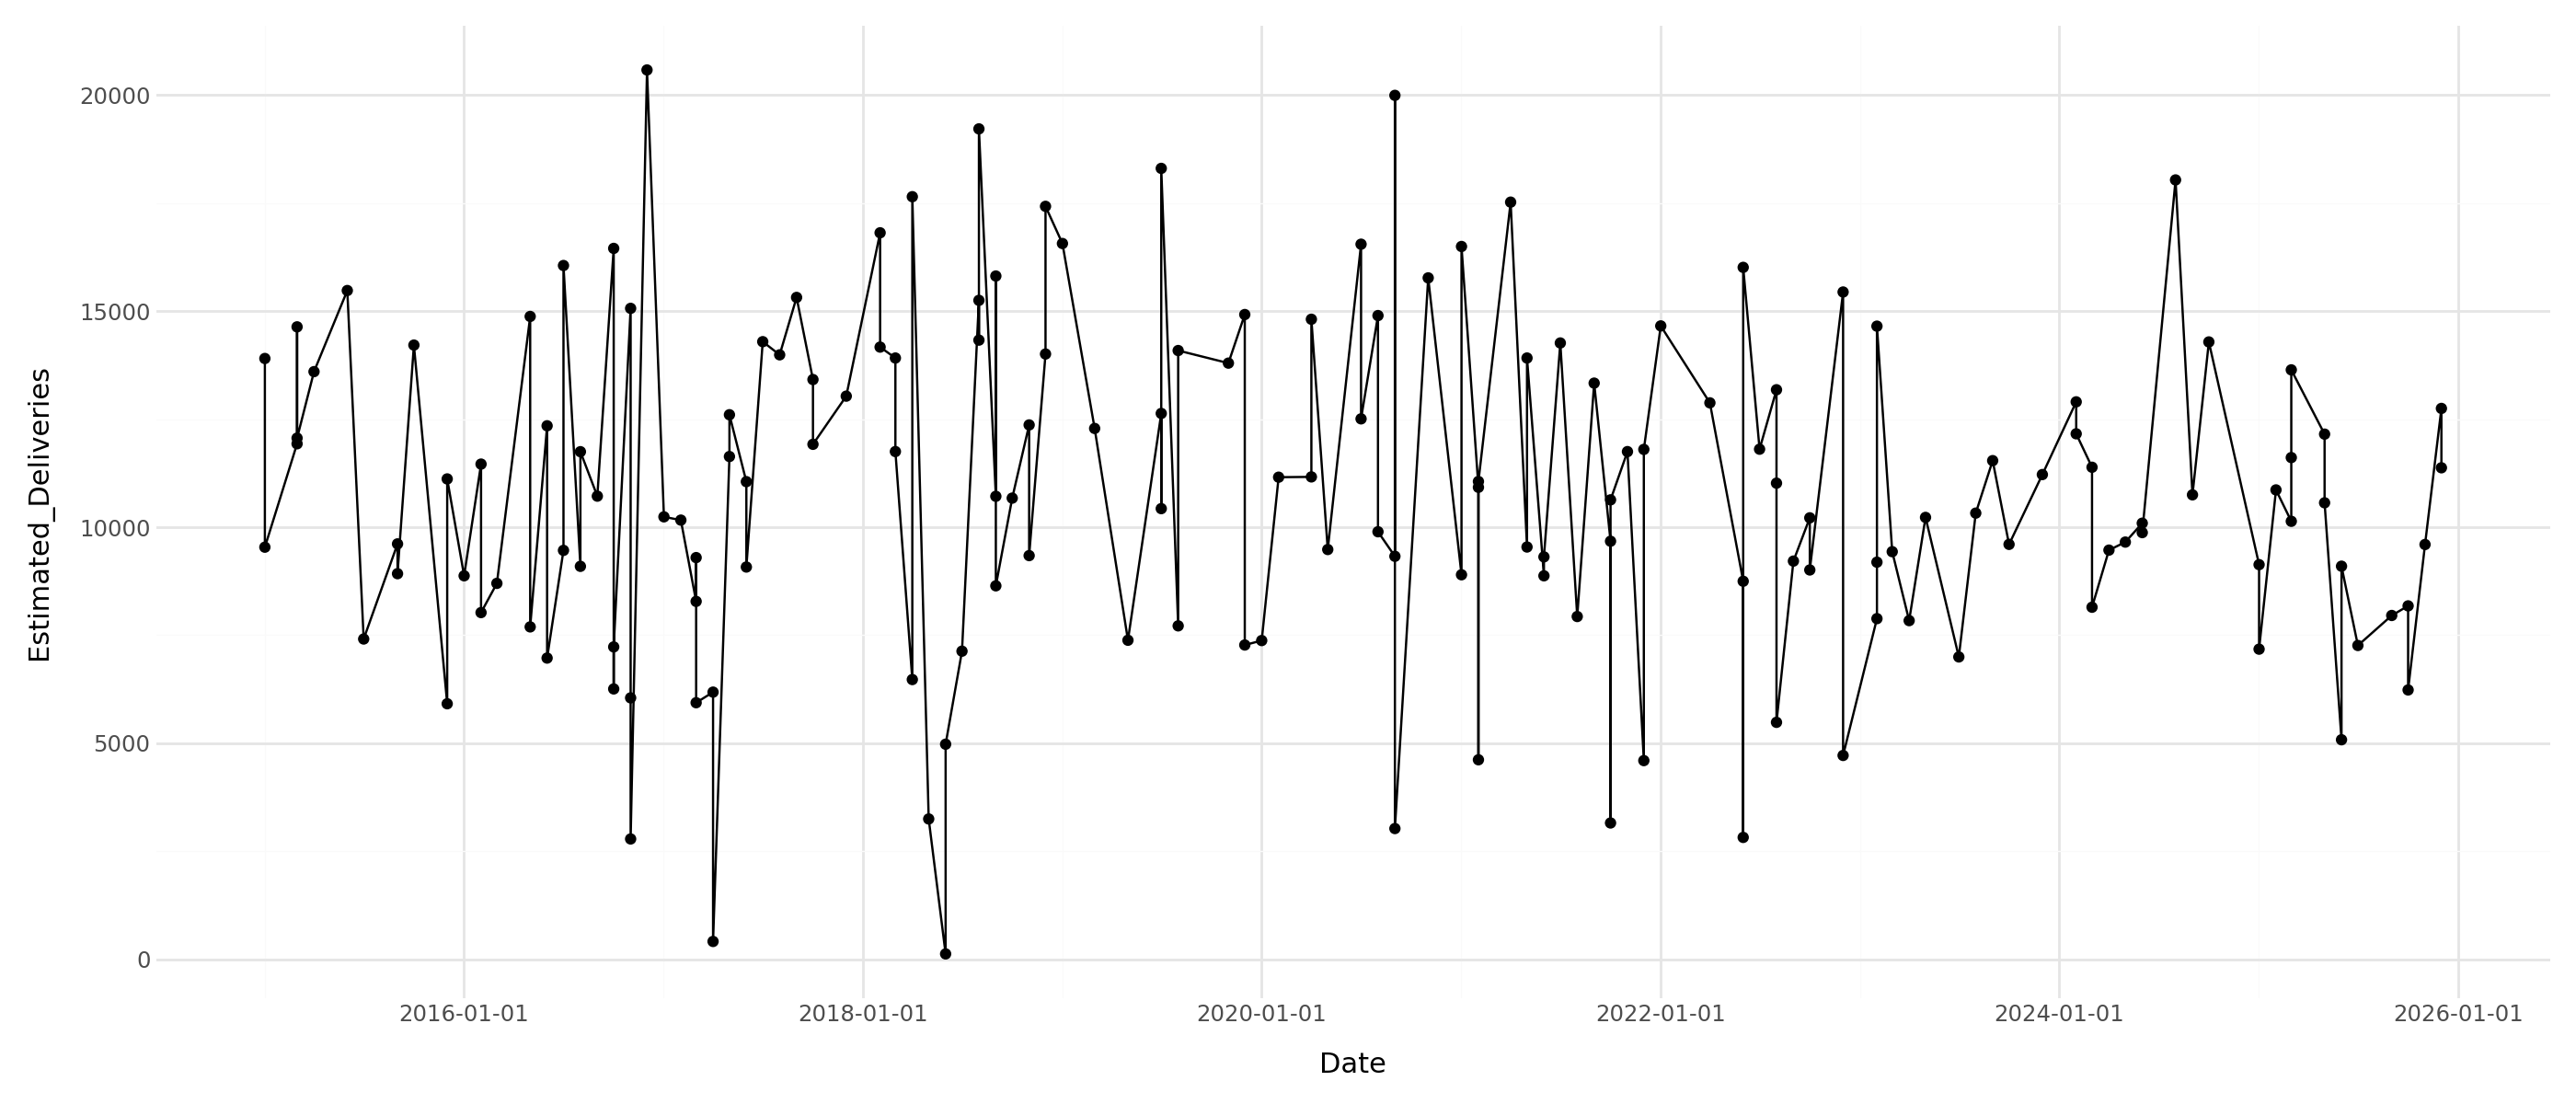

In [103]:
# plotando pela quantidade de vendas em estimated deliveries
from plotnine import ggplot, aes, geom_line, geom_point, theme, theme_minimal

df_model_official = df_model[df_model['Source_Type'] == 'Official (Quarter)'].reset_index(drop=True)

(
    ggplot(df_model_official, aes(x='Date', y='Estimated_Deliveries'))
    + theme_minimal()
    + geom_line()
    + geom_point()
    + theme(figure_size=(14,6))
)

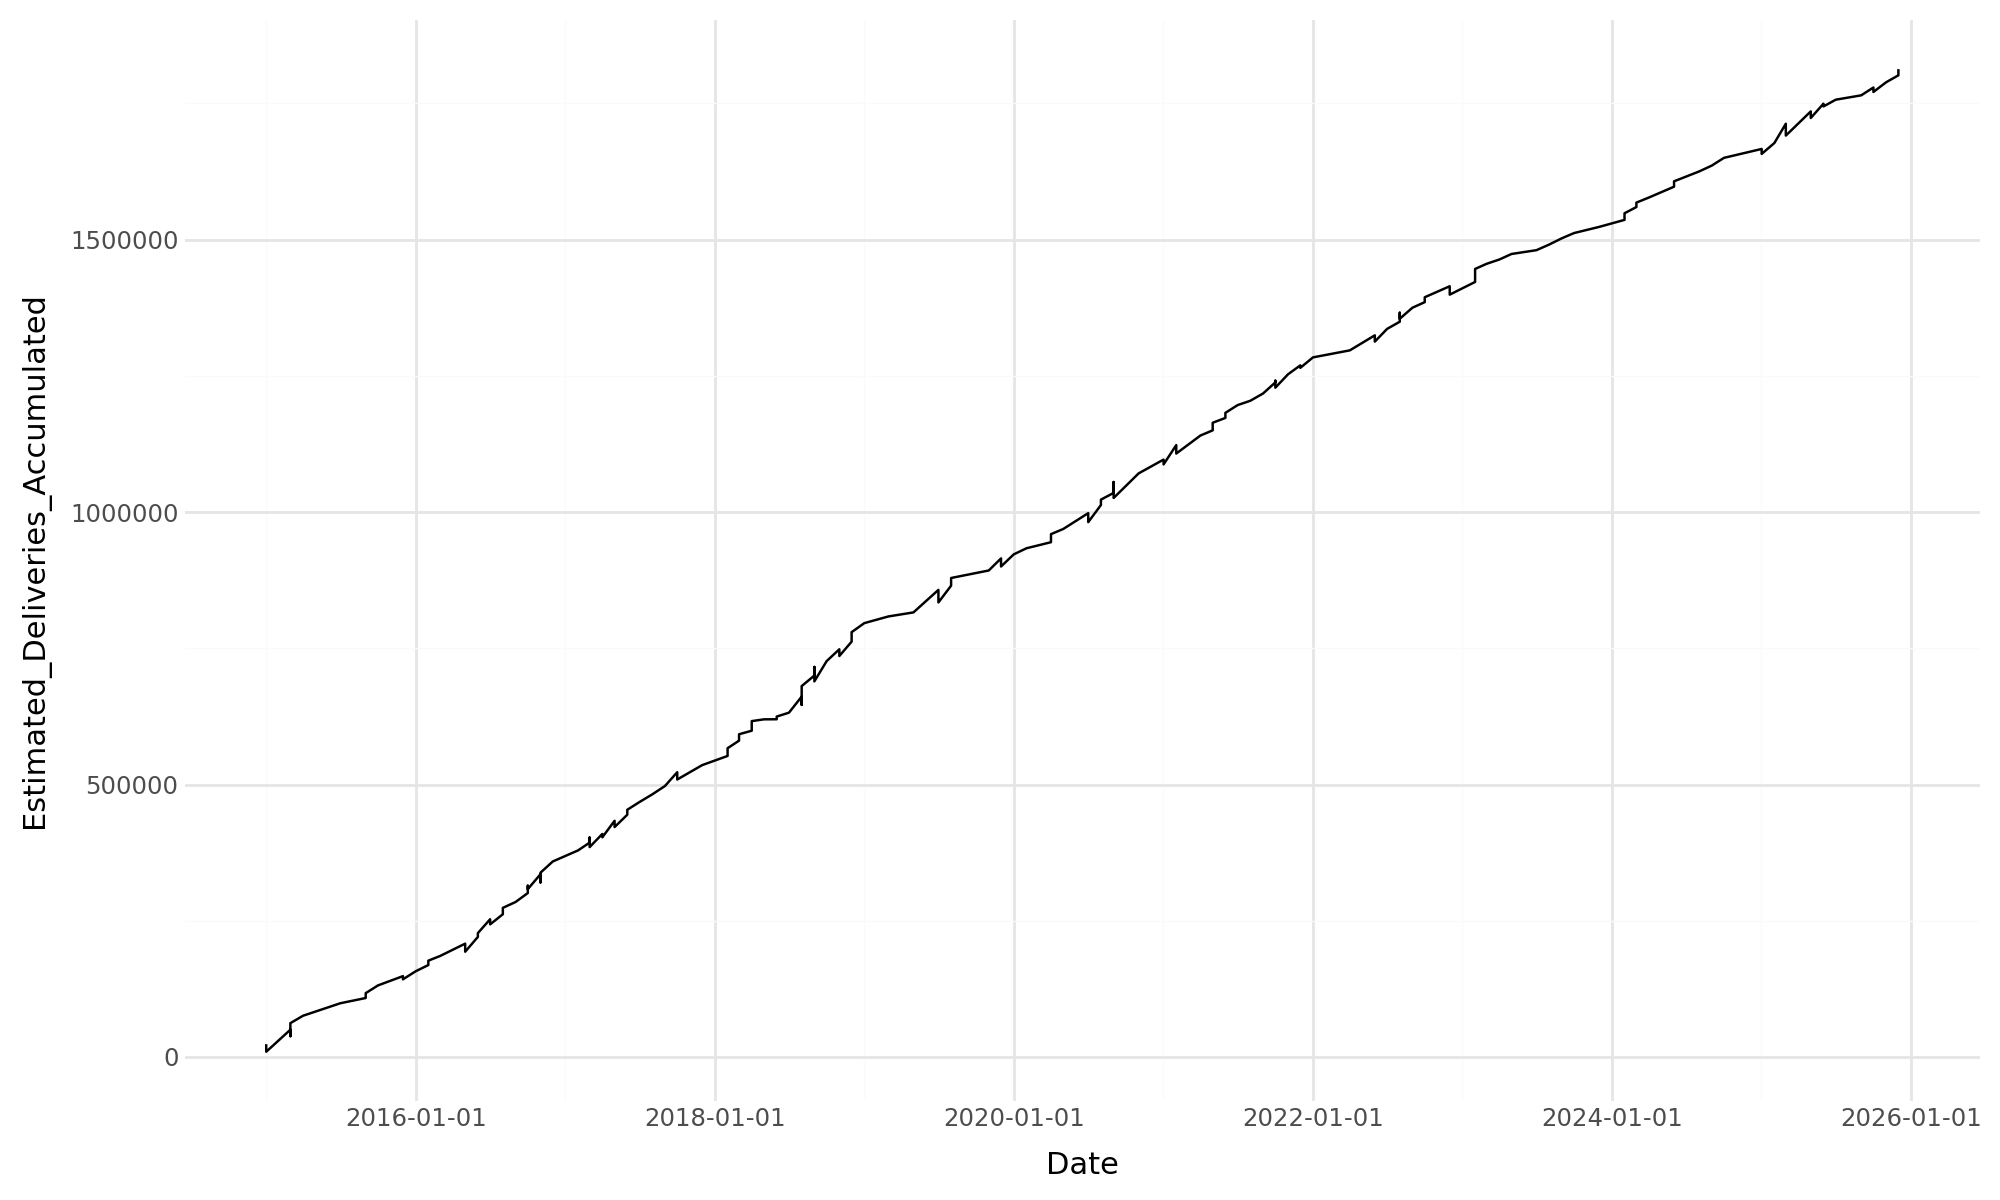

In [104]:
# vendo valor acumulado de entregas ao longo do tempo
df_model_official['Estimated_Deliveries_Accumulated'] = df_model_official.sort_values('Date')['Estimated_Deliveries'].cumsum()

# plotando
(
    ggplot(df_model_official, aes(x='Date', y='Estimated_Deliveries_Accumulated'))
    + theme_minimal()
    + geom_line()
    + theme(figure_size=(10,6))
)

In [105]:
df_model_official

,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations,Date,Estimated_Deliveries_Accumulated
0,2020,7,Europe,Model S,16546,17888,97411.05,100,585,1451.91,Official (Quarter),14471,2020-07-01,998030
1,2016,10,Asia,Model S,16449,17908,99184.36,82,460,1134.98,Official (Quarter),9148,2016-10-01,300793
2,2020,9,Middle East,Model S,9326,10117,100029.16,100,596,833.74,Official (Quarter),13947,2020-09-01,1035173
3,2017,12,Europe,Model S,13031,13160,51340.88,60,354,691.95,Official (Quarter),9296,2017-12-01,535600
4,2018,7,North America,Model S,7131,8189,97902.00,82,489,523.06,Official (Quarter),4710,2018-07-01,631846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,2018,3,Middle East,Model S,11749,13122,51134.03,120,709,1249.51,Official (Quarter),3481,2018-03-01,592238
163,2017,7,North America,Model S,14291,14867,75791.42,120,713,1528.42,Official (Quarter),10997,2017-07-01,467935
164,2022,1,Europe,Model S,14656,14684,98666.08,60,342,751.85,Official (Quarter),9786,2022-01-01,1283873
165,2016,5,Asia,Model S,7693,7715,68186.92,120,705,813.53,Official (Quarter),4645,2016-05-01,193078


Eliminação proposital de períodos e estimação dos dados faltantes usando diferentes técnicas de imputação (Interpolação Linear, Média Móvel, Regressão, KNN, etc.)

In [ ]:
# eliminando 20 linhas
from random import choice
from numpy import nan

df_nan = df_model_official.copy()

for i in range(20):
    index = choice(df_nan.index)
    print(index)
    print(df_nan.iloc[index])
    df_nan.loc[index, 'Estimated_Deliveries'] = nan

109
Year                                               2025
Month                                                11
Region                                    North America
Model                                           Model S
Estimated_Deliveries                               9599
Production_Units                                   9925
Avg_Price_USD                                  59039.55
Battery_Capacity_kWh                                 60
Range_km                                            358
CO2_Saved_tons                                   515.47
Source_Type                          Official (Quarter)
Charging_Stations                                 11542
Date                                2025-11-01 00:00:00
Estimated_Deliveries_Accumulated                1788753
Name: 109, dtype: object
146
Year                                               2017
Month                                                 8
Region                                           Europe
Model          

c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\geoms\geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\layer.py:374: PlotnineWarning: geom_point : Removed 20 rows containing missing values.


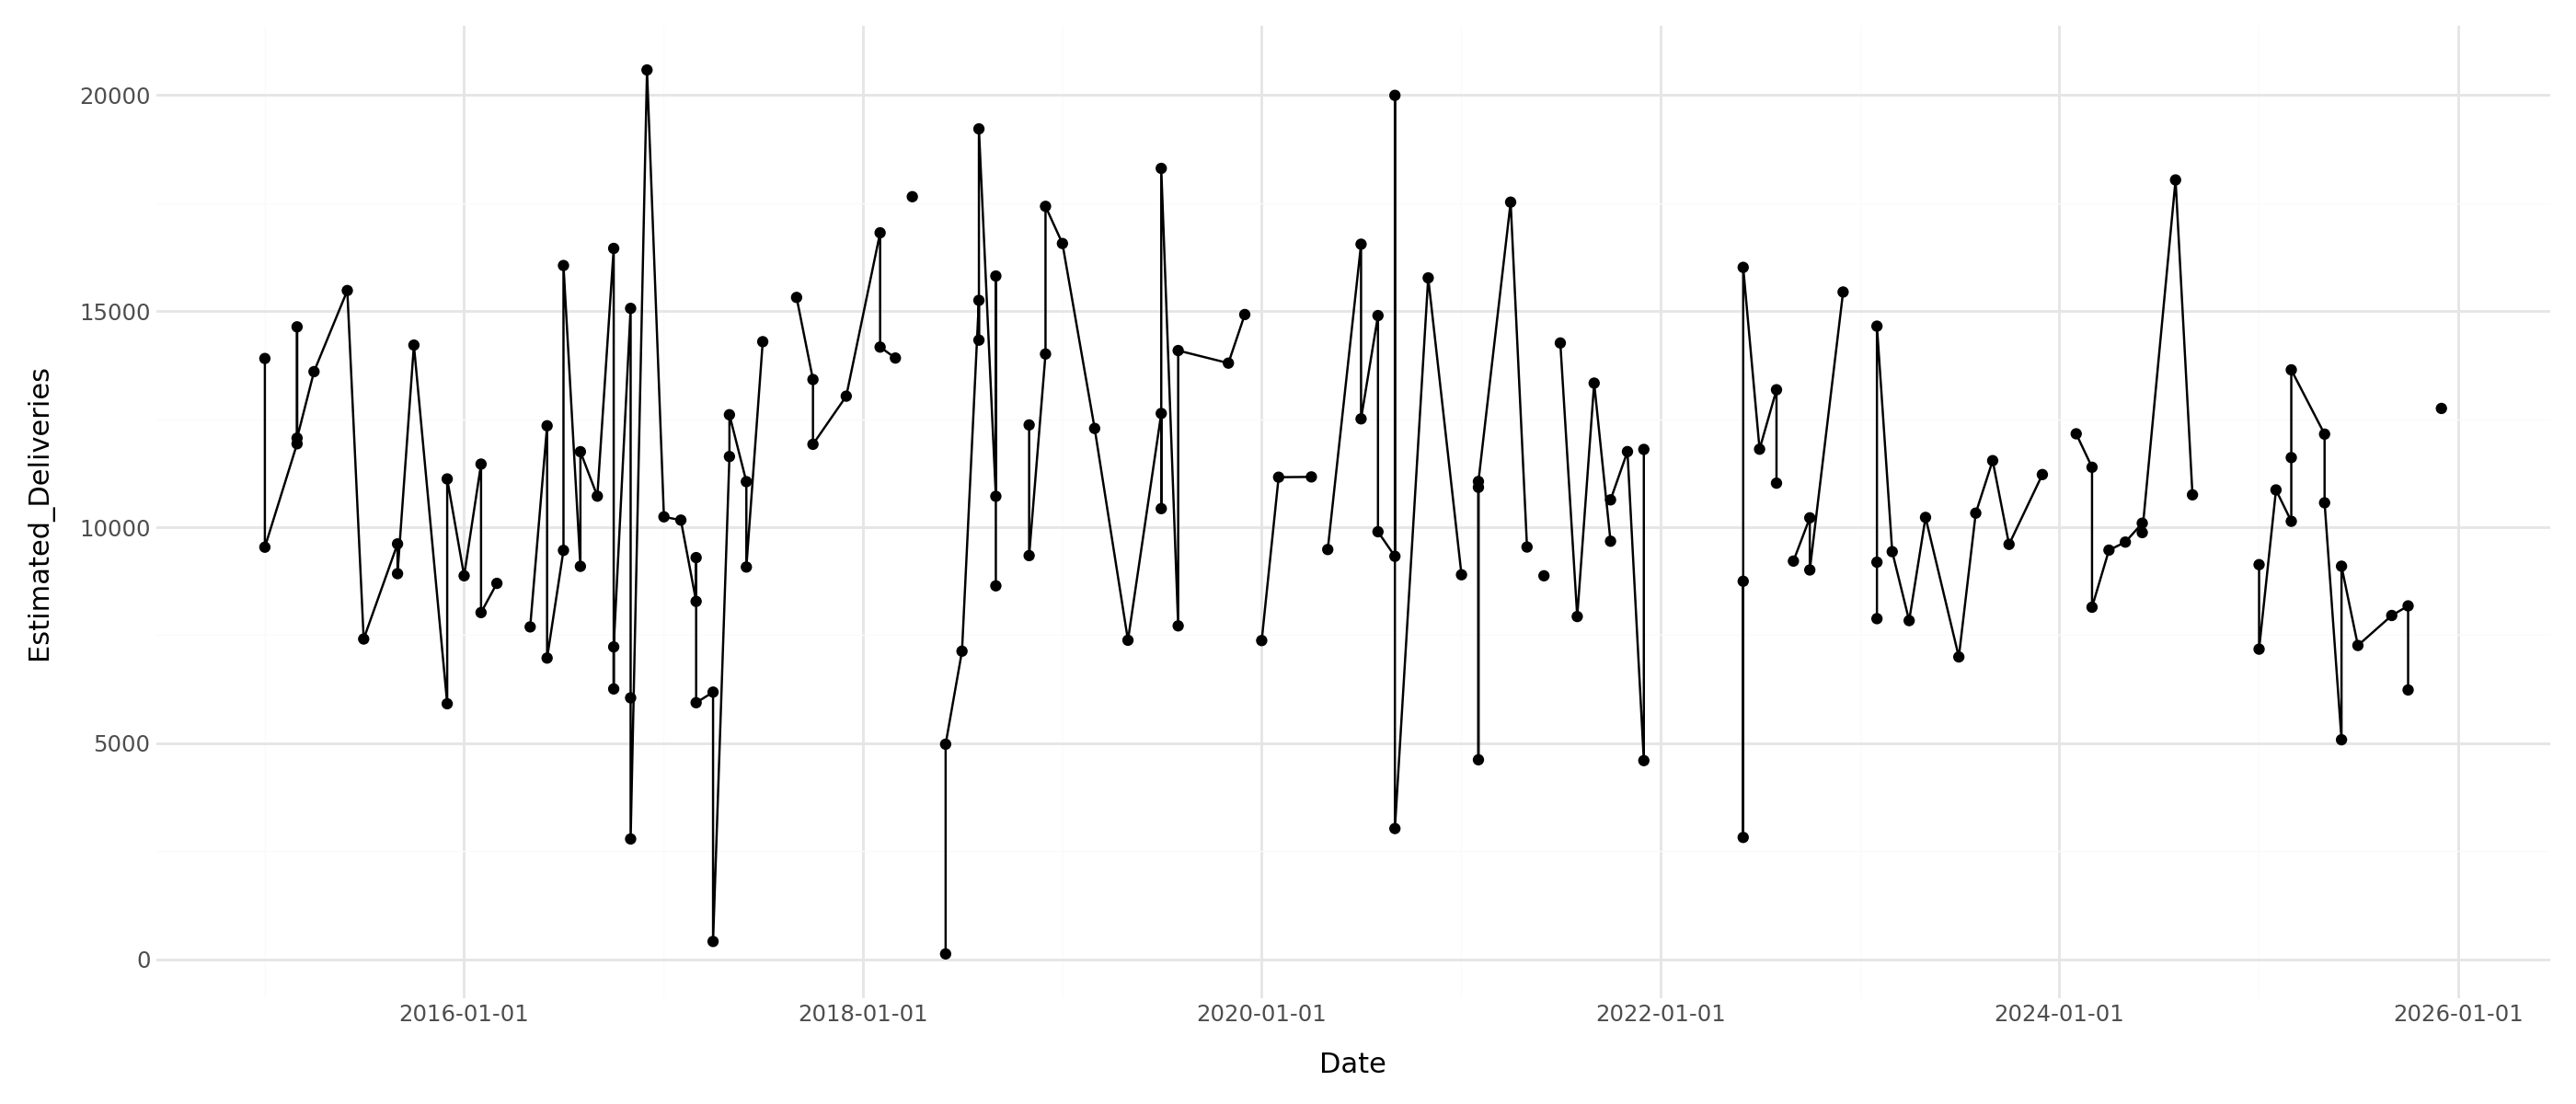

In [118]:
# plotando novamente
(
    ggplot(df_nan, aes(x='Date', y='Estimated_Deliveries'))
    + theme_minimal()
    + geom_line()
    + geom_point()
    + theme(figure_size=(14,6))
)

| Método                 | Tipo de Dado          | Complexidade | Preserva Variabilidade? | Comentário                 |
| ---------------------- | --------------------- | ------------ | ----------------------- | -------------------------- |
| Média / Mediana / Moda | Numérico / Categórico | Baixa        | ❌ Não                   | Simples, rápido            |
| Regressão              | Numérico              | Média        | ⚠️ Parcialmente         | Considera outras variáveis |
| KNN                    | Numérico / Categórico | Média        | ✅ Sim                   | Preserva estrutura local   |
| MICE                   | Numérico / Categórico | Alta         | ✅ Sim                   | Estatisticamente robusto   |
| MissForest             | Numérico / Categórico | Alta         | ✅ Sim                   | Usa ML                     |
| Interpolação           | Séries Temporais      | Média        | ✅ Sim                   | Mantém tendência temporal  |

Faremos com forward fill e back fill, interpolação (específicas de series temporais), média que é a pior e knn


"linear" → padrão; conecta pontos com uma linha reta

"time" → leva em conta o índice temporal (para DatetimeIndex)

"polynomial" → usa uma função polinomial de grau n

"spline" → usa curvas suaves (splines)

"nearest", "quadratic", "cubic" → outras formas não lineares

In [136]:
df_model_official = df_model_official.set_index('Date').reset_index()
df_nan = df_nan.set_index('Date')

KeyError: "None of ['Date'] are in the columns"

In [137]:
df_model_official = df_model_official.sort_index()
df_nan = df_nan.sort_index()

In [ ]:
from sklearn.metrics import root_mean_squared_error
methods = {
    'ffill_bfill': lambda s: s.bfill().ffill(),
    'mean': lambda s: s.fillna(s.mean()),
    'interpolate_linear': lambda s: s.interpolate('linear'),
    'interpolate_time': lambda s: s.interpolate('time'),
    'interpolate_nearest': lambda s: s.interpolate('nearest'),

    # convertendo para usar ordem numérica em vez de datas:
    'interpolate_polynomial': lambda s: s.reset_index(drop=True).interpolate(method='polynomial', order=2),
    'interpolate_spline': lambda s: s.reset_index(drop=True).interpolate(method='spline', order=2),
    'interpolate_quadratic': lambda s: s.reset_index(drop=True).interpolate(method='quadratic'),
    'interpolate_cubic': lambda s: s.reset_index(drop=True).interpolate(method='cubic')
}


results = []

# Máscara para comparar só nas posições que tinham valores faltantes
mask_missing = df_nan['Estimated_Deliveries'].isna()

for name, func in methods.items():
    s_imputed = func(df_nan['Estimated_Deliveries'])
    
    # se a imputação perdeu o índice original, reatribui
    s_imputed.index = df_nan.index

    y_true = df_model_official.loc[mask_missing, 'Estimated_Deliveries']
    y_pred = s_imputed.loc[mask_missing]

    mask_valid = ~(y_true.isna() | y_pred.isna())
    rmse = root_mean_squared_error(y_true[mask_valid], y_pred[mask_valid])
    results.append({'method': name, 'rmse': rmse})



ffill_bfill 0
mean 0
interpolate_linear 0
interpolate_time 0
interpolate_nearest 0
interpolate_polynomial 1
interpolate_spline 0
interpolate_quadratic 1
interpolate_cubic 1


Comparação entre valores reais e estimados.

In [143]:
df_results = pd.DataFrame(results).sort_values('rmse')
print(df_results)


                   method         rmse
1                    mean  4112.658233
2      interpolate_linear  5068.160137
3        interpolate_time  5677.687044
0             ffill_bfill  5776.820094
6      interpolate_spline  6351.174898
5  interpolate_polynomial  6473.114843
7   interpolate_quadratic  6473.114843
8       interpolate_cubic  6595.390789
4     interpolate_nearest  6816.420688


In [ ]:
# testando o mesmo para valores acumulados

# eliminando 20 linhas
from random import choice
from numpy import nan

df_nan = df_model_official.copy()

df_nan = df_nan.reset_index()

for i in range(20):
    index = choice(df_nan.index)
    print(index)
    print(df_nan.iloc[index])
    df_nan.loc[index, 'Estimated_Deliveries_Accumulated'] = nan

105
Date                                2021-07-01 00:00:00
Year                                               2021
Month                                                 7
Region                                             Asia
Model                                           Model S
Estimated_Deliveries                              14261
Production_Units                                  14799
Avg_Price_USD                                 118672.06
Battery_Capacity_kWh                                120
Range_km                                            696
CO2_Saved_tons                                  1488.85
Source_Type                          Official (Quarter)
Charging_Stations                                 12522
Estimated_Deliveries_Accumulated                1196341
Name: 105, dtype: object
48
Date                                2017-10-01 00:00:00
Year                                               2017
Month                                                10
Region          

In [ ]:
df_nan = df_nan.set_index('Date')

In [149]:
from sklearn.metrics import root_mean_squared_error
methods = {
    'ffill_bfill': lambda s: s.bfill().ffill(),
    'mean': lambda s: s.fillna(s.mean()),
    'interpolate_linear': lambda s: s.interpolate('linear'),
    'interpolate_time': lambda s: s.interpolate('time'),
    'interpolate_nearest': lambda s: s.interpolate('nearest'),

    # convertendo para usar ordem numérica em vez de datas:
    'interpolate_polynomial': lambda s: s.reset_index(drop=True).interpolate(method='polynomial', order=2),
    'interpolate_spline': lambda s: s.reset_index(drop=True).interpolate(method='spline', order=2),
    'interpolate_quadratic': lambda s: s.reset_index(drop=True).interpolate(method='quadratic'),
    'interpolate_cubic': lambda s: s.reset_index(drop=True).interpolate(method='cubic')
}


results = []

# Máscara para comparar só nas posições que tinham valores faltantes
mask_missing = df_nan['Estimated_Deliveries_Accumulated'].isna()

for name, func in methods.items():
    s_imputed = func(df_nan['Estimated_Deliveries_Accumulated'])
    
    # se a imputação perdeu o índice original, reatribui
    s_imputed.index = df_nan.index

    y_true = df_model_official.loc[mask_missing, 'Estimated_Deliveries_Accumulated']
    y_pred = s_imputed.loc[mask_missing]

    mask_valid = ~(y_true.isna() | y_pred.isna())
    rmse = root_mean_squared_error(y_true[mask_valid], y_pred[mask_valid])
    results.append({'method': name, 'rmse': rmse})



In [150]:
df_results = pd.DataFrame(results).sort_values('rmse')
print(df_results)


                   method           rmse
2      interpolate_linear    2873.027930
6      interpolate_spline    2916.185825
5  interpolate_polynomial    2916.263377
7   interpolate_quadratic    2916.263377
8       interpolate_cubic    2940.814920
3        interpolate_time   11370.928168
0             ffill_bfill   11944.483197
4     interpolate_nearest   13364.791581
1                    mean  465251.547755


## 📊 Comparação de métodos de imputação por grupo

### 🧩 **Cenário 1 — Série Estável (sem tendência)**

| Grupo                                | Métodos incluídos                                       | RMSE médio | Melhor dentro do grupo | Observações                                                                                     |
| ------------------------------------ | ------------------------------------------------------- | ---------: | ---------------------- | ----------------------------------------------------------------------------------------------- |
| **Preenchimento simples**            | `mean`, `ffill_bfill`                                   |  **4 944** | 🟩 `mean` (4 112)      | Como a série não tem tendência, a média funciona bem. O forward/backfill cria pequenos degraus. |
| **Interpolação linear / temporal**   | `interpolate_linear`, `interpolate_time`                |  **5 372** | 🟦 `linear` (5 068)    | Reproduzem bem pequenas variações, mas não trazem ganho expressivo.                             |
| **Interpolação polinomial / spline** | `polynomial`, `quadratic`, `cubic`, `spline`, `nearest` |  **6 542** | 🟧 `spline` (6 351)    | Introduzem ruído e pequenas oscilações desnecessárias. Overfitting leve.                        |

➡️ **Melhor grupo geral:** Preenchimento simples
➡️ **Melhor método:** `mean`

---

### 📈 **Cenário 2 — Série Acumulada (com tendência de alta)**

| Grupo                                | Métodos incluídos                                       |  RMSE médio | Melhor dentro do grupo    | Observações                                                                       |
| ------------------------------------ | ------------------------------------------------------- | ----------: | ------------------------- | --------------------------------------------------------------------------------- |
| **Preenchimento simples**            | `mean`, `ffill_bfill`                                   | **238 098** | 🔴 `ffill_bfill` (11 944) | A média destrói a tendência. Forward/backfill mantém direção, mas erra magnitude. |
| **Interpolação linear / temporal**   | `interpolate_linear`, `interpolate_time`                |   **7 122** | 🟦 `linear` (2 873)       | Linear mantém a tendência crescente e suaviza bem as lacunas.                     |
| **Interpolação polinomial / spline** | `polynomial`, `quadratic`, `cubic`, `spline`, `nearest` |   **4 811** | 🟧 `spline` (2 916)       | Resultados próximos ao linear; ligeira diferença por curvatura excessiva.         |

➡️ **Melhor grupo geral:** Interpolação linear/polinomial
➡️ **Melhor método:** `interpolate_linear`

---

## ⚖️ **Resumo global**

| Tipo de série             | Melhor grupo             | Melhor método        | RMSE médio | Características                                                    |
| ------------------------- | ------------------------ | -------------------- | ---------: | ------------------------------------------------------------------ |
| Estável / estacionária    | 🟩 Preenchimento simples | `mean`               |     ~4 100 | A média já representa bem a série; métodos complexos não melhoram. |
| Acumulada / com tendência | 🟦 Interpolação linear   | `interpolate_linear` |     ~2 900 | Preserva o crescimento e mantém coerência entre pontos.            |